# Part 1: Exploratory Data Analysis

In [3]:
# Imports
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data exploration

In [4]:
df = pd.read_csv("porto.csv")

# Display first few rows
df.T

,0,1,2,3,4,5,6,7,8,9,...,1710660,1710661,1710662,1710663,1710664,1710665,1710666,1710667,1710668,1710669
TRIP_ID,1372636858620000589,1372637303620000596,1372636951620000320,1372636854620000520,1372637091620000337,1372636965620000231,1372637210620000456,1372637299620000011,1372637274620000403,1372637905620000320,...,1384165182620000170,1404164723620000332,1404155105620000121,1388660427620000585,1390403767620000911,1404171463620000698,1404171367620000670,1388745716620000264,1404141826620000248,1404157147620000079
CALL_TYPE,C,B,C,C,C,C,C,C,C,C,...,C,B,B,C,C,C,C,C,B,B
ORIGIN_CALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_STAND,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.0,9.0,NaN,NaN,NaN,NaN,NaN,12.0,34.0
TAXI_ID,20000589,20000596,20000320,20000520,20000337,20000231,20000456,20000011,20000403,20000320,...,20000170,20000332,20000121,20000585,20000911,20000698,20000670,20000264,20000248,20000079
TIMESTAMP,1372636858,1372637303,1372636951,1372636854,1372637091,1372636965,1372637210,1372637299,1372637274,1372637905,...,1384165182,1404164723,1404155105,1388660427,1390403767,1404171463,1404171367,1388745716,1404141826,1404157147
DAY_TYPE,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
MISSING_DATA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
POLYLINE,"[[-8.618643,41.141412],[-8.618499,41.141376],[...","[[-8.639847,41.159826],[-8.640351,41.159871],[...","[[-8.612964,41.140359],[-8.613378,41.14035],[-...","[[-8.574678,41.151951],[-8.574705,41.151942],[...","[[-8.645994,41.18049],[-8.645949,41.180517],[-...","[[-8.615502,41.140674],[-8.614854,41.140926],[...","[[-8.57952,41.145948],[-8.580942,41.145039],[-...","[[-8.617563,41.146182],[-8.617527,41.145849],[...","[[-8.611794,41.140557],[-8.611785,41.140575],[...","[[-8.615907,41.140557],[-8.614449,41.141088],[...",...,"[[-8.643303,41.13648]]","[[-8.585703,41.148567],[-8.585739,41.148855],[...","[[-8.606385,41.144742],[-8.606466,41.144742],[...","[[-8.60697,41.162283],[-8.60697,41.16231],[-8....",[],"[[-8.612469,41.14602],[-8.612487,41.145993],[-...","[[-8.610138,41.140845],[-8.610174,41.140935],[...",[],"[[-8.630712,41.154885],[-8.63073,41.154813],[-...","[[-8.615538,41.140629],[-8.615421,41.140746],[..."


In [5]:
# Summary statistics
df.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


In [6]:
# Data types of each column
df.dtypes

TRIP_ID           int64
CALL_TYPE        object
ORIGIN_CALL     float64
ORIGIN_STAND    float64
TAXI_ID           int64
TIMESTAMP         int64
DAY_TYPE         object
MISSING_DATA       bool
POLYLINE         object
dtype: object

### Missing values

In [5]:
missing_values = df.isnull().sum()

# Convert to DataFrame for nicer view
missing_df = pd.DataFrame({
    "Column": missing_values.index,
    "Missing Count": missing_values.values
})

missing_df

,Column,Missing Count
0,TRIP_ID,0
1,CALL_TYPE,0
2,ORIGIN_CALL,1345900
3,ORIGIN_STAND,904091
4,TAXI_ID,0
5,TIMESTAMP,0
6,DAY_TYPE,0
7,MISSING_DATA,0
8,POLYLINE,0


In [48]:
df_ct = df.loc[df["CALL_TYPE"] == "A", ["CALL_TYPE", "ORIGIN_CALL"]]
df_cs = df.loc[df["CALL_TYPE"] == "B", ["CALL_TYPE", "ORIGIN_STAND"]]

print(f'Number of instances where column ORIGIN_CALL is missing when CALL_TYPE == A: {df_ct["ORIGIN_CALL"].isnull().sum()}')
print(f'Number of instances where column ORIGIN_STAND is missing when CALL_TYPE == B: {df_cs["ORIGIN_STAND"].isnull().sum()}')


Number of instances where column ORIGIN_CALL is missing when CALL_TYPE == A: 0
Number of instances where column ORIGIN_STAND is missing when CALL_TYPE == B: 11302


### Outliers with Z-score > 3

In [72]:
z_score_threshold = 3

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
total_rows = len(df)
results = []

for col in numeric_cols:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    count = (np.abs(z_scores) > z_score_threshold).sum()
    percent = 100 * count / total_rows
    results.append({"Column": col, "Outlier Count": count, "Outlier %": round(percent, 2)})

outlier_df = pd.DataFrame(results)
outlier_df

,Column,Outlier Count,Outlier %
0,TRIP_ID,0,0.0
1,ORIGIN_CALL,0,0.0
2,ORIGIN_STAND,0,0.0
3,TAXI_ID,0,0.0
4,TIMESTAMP,0,0.0


### Unique values

In [8]:
relevant_cols = ['CALL_TYPE', 'DAY_TYPE']

for col in relevant_cols:
    print(f"{col}: {df[col].unique()}")

CALL_TYPE: ['C' 'B' 'A']
DAY_TYPE: ['A']


#### Column: TRIP_ID

In [9]:
# Count instances of duplicated trip id
duplicate_count = df["TRIP_ID"].duplicated().sum()
print("Number of duplicate TRIP_ID rows:", duplicate_count)

# Count occurrences of each TRIP_ID
trip_id_counts = df["TRIP_ID"].value_counts()

# Filter only those with more than 1 occurrence
duplicates = trip_id_counts[trip_id_counts > 1]

print("Duplicated TRIP_IDs and their counts:")
duplicates

Number of duplicate TRIP_ID rows: 81
Duplicated TRIP_IDs and their counts:


TRIP_ID
1397172149620000454    3
1402085470620000527    2
1389002485620000685    2
1393869017620000066    2
1389782974620000562    2
                      ..
1400060661620000080    2
1394034338620000328    2
1373025987620000601    2
1394118360620000066    2
1373210896620000598    2
Name: count, Length: 80, dtype: int64

#### Column: CALL_TYPE

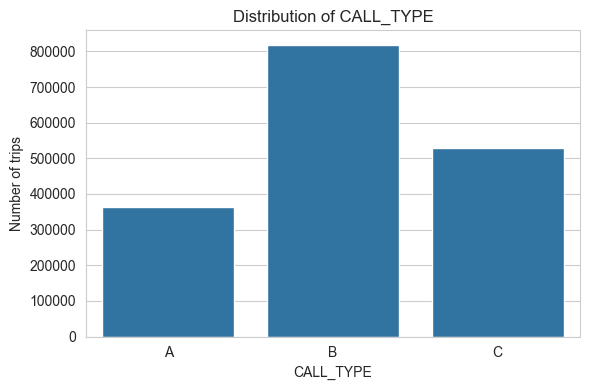

In [29]:
# Get counts of CALL_TYPE
call_counts = df["CALL_TYPE"].value_counts().reset_index()
call_counts.columns = ["CALL_TYPE", "count"]

call_counts = call_counts.sort_values("CALL_TYPE")

# Plot with seaborn barplot
plt.figure(figsize=(6,4))
sns.barplot(x="CALL_TYPE", y="count", data=call_counts)
plt.title("Distribution of CALL_TYPE")
plt.xlabel("CALL_TYPE")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()



In [25]:
call_counts

,CALL_TYPE,count
0,B,817881
1,C,528019
2,A,364770


Number of rows with CALL_TYPE == B: 817881
NUmber of instances where column ORIGIN_STAND is missing when CALL_TYPE == B: 11302


#### Column: ORIGIN_CALL

In [30]:
top5_origin_calls = df["ORIGIN_CALL"].value_counts()
print("Top 5 origin_calls:")
top5_origin_calls

Top 5 origin_calls:


ORIGIN_CALL
2002.0     57571
63882.0     6406
2001.0      2499
13168.0     1314
6728.0      1115
           ...  
23600.0        1
37142.0        1
7028.0         1
49288.0        1
34164.0        1
Name: count, Length: 57105, dtype: int64

In [31]:
unique_origin_calls = df["ORIGIN_CALL"].nunique()
print("Number of different ORIGIN_CALL IDs:", unique_origin_calls)

Number of different ORIGIN_CALL IDs: 57105


#### Column: ORIGIN_STAND

In [35]:
top5_origin_stand = df["ORIGIN_STAND"].value_counts()
print("Top 5 origin_stand:")
top5_origin_stand

Top 5 origin_stand:


ORIGIN_STAND
15.0    80241
57.0    50882
9.0     34818
33.0    34128
23.0    33344
        ...  
41.0      506
43.0      493
8.0       381
5.0        53
48.0        7
Name: count, Length: 63, dtype: int64

In [34]:
unique_origin_calls = df["ORIGIN_STAND"].nunique()
print("Number of different ORIGIN_STAND IDs:", unique_origin_calls)

Number of different ORIGIN_STAND IDs: 63


#### Column: TAXI_ID

In [83]:
top5_taxis = df["TAXI_ID"].value_counts()
print("Top 5 taxis with most trips:")
top5_taxis

Top 5 taxis with most trips:


TAXI_ID
20000080    10746
20000403     9238
20000066     8449
20000364     7821
20000483     7729
            ...  
20000264        2
20000911        2
20000940        1
20000970        1
20000931        1
Name: count, Length: 448, dtype: int64

In [81]:
num_unique_taxis = df["TAXI_ID"].nunique()
print("\nTotal number of unique taxis:", num_unique_taxis)


Total number of unique taxis: 448


#### Column: TIMESTAMP


In [68]:
df_timestamp = df
df_timestamp['timestamp2'] = pd.to_datetime(df['TIMESTAMP'], unit='s')

In [69]:
df['TIMESTAMP'].min(), df['TIMESTAMP'].max()


(1372636853, 1404172796)

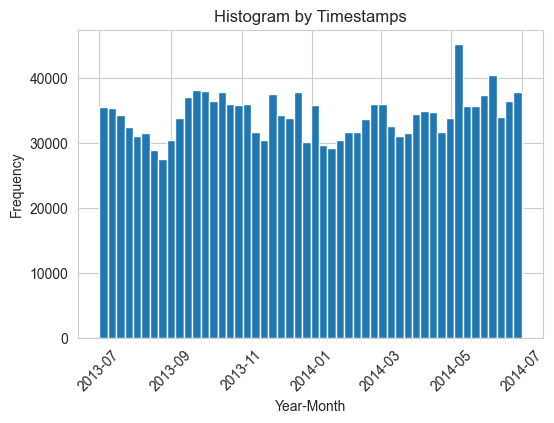

In [70]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df_timestamp['timestamp2'], bins=50)
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.title('Histogram by Timestamps')
plt.xticks(rotation=45)
plt.show()

In [52]:
df.loc[df["TIMESTAMP"] == 0, "TIMESTAMP"].sum()


0

#### Column: DAY_TYPE

In [78]:
total_rows
day_type_a_rows = df.loc[df["DAY_TYPE"] == "A"].shape[0]


print(f'Number of total rows: {total_rows}')
print(f'Number of rows where DAY_TYPE == A: {day_type_a_rows}')

Number of total rows: 1710670
Number of rows where DAY_TYPE == A: 1710670


#### Column: MISSING_DATA

In [80]:
# Count rows where MISSING_DATA is exactly False
false_count = (df["MISSING_DATA"] == False).sum()
print(f"Number of trips where MISSING_DATA is False: {false_count}")

# Count rows where MISSING_DATA is exactly True
true_count = (df["MISSING_DATA"] == True).sum()
print(f"Number of trips where MISSING_DATA is True: {true_count}")

Number of trips where MISSING_DATA is False: 1710660
Number of trips where MISSING_DATA is True: 10


#### Column: POLYLINE

Minimum number of polyline points: 0
Maximum number of polyline points: 3881


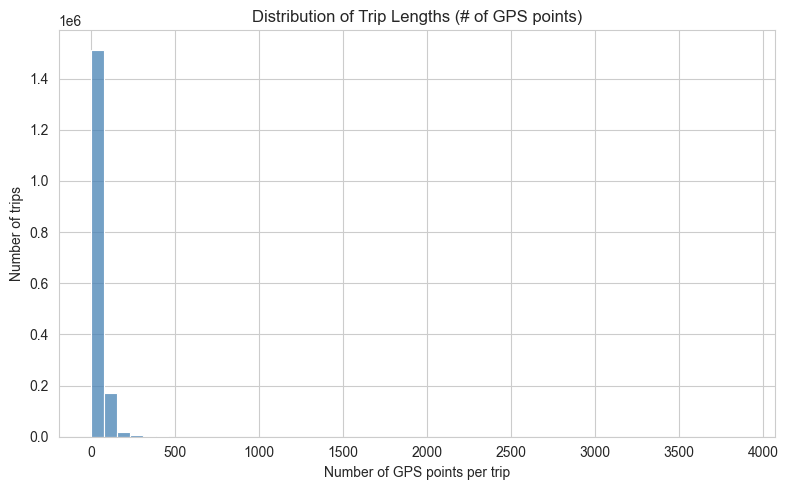

In [84]:
import json

def parse_poly(s):
    try:
        return json.loads(s)
    except Exception:
        return []
    
df["POLYLINE"] = df["POLYLINE"].apply(parse_poly)
df["NUM_POINTS"] = df["POLYLINE"].apply(len)

In [ ]:
# Find min and max
min_points = df["NUM_POINTS"].min()
max_points = df["NUM_POINTS"].max()
print("Minimum number of polyline points:", min_points)
print("Maximum number of polyline points:", max_points)

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["NUM_POINTS"], bins=50, color="steelblue")
plt.title("Distribution of Trip Lengths (# of GPS points)")
plt.xlabel("Number of GPS points per trip")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()

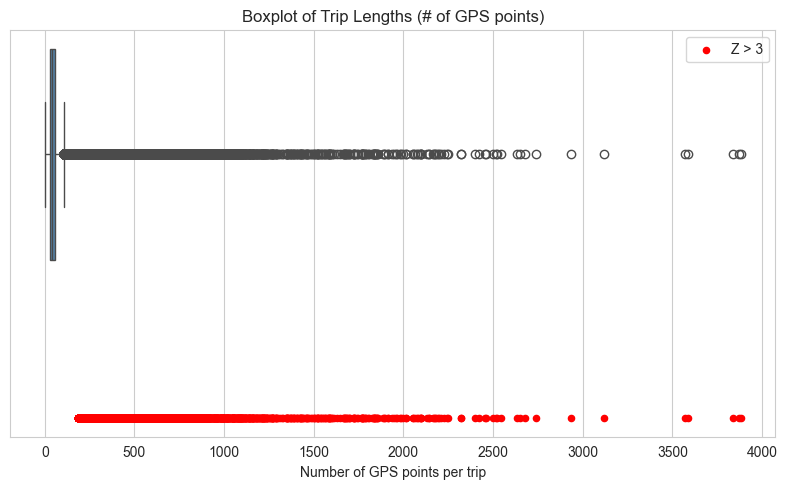

In [86]:
col = "NUM_POINTS"
z_score_threshold = 3  # adjust as needed

fig, ax = plt.subplots(figsize=(8, 5))

# Compute Z-scores
z_scores = (df[col] - df[col].mean()) / df[col].std()

# Identify outliers
outliers = df[np.abs(z_scores) > z_score_threshold][col]

# Base boxplot
sns.boxplot(x=df[col], ax=ax, color="steelblue")

# Overlay outliers as red points
if not outliers.empty:
    y = np.ones(len(outliers))
    ax.scatter(outliers, y, color="red", zorder=5, label=f"Z > {z_score_threshold}", s=20)

# Titles and labels
ax.set_title("Boxplot of Trip Lengths (# of GPS points)")
ax.set_xlabel("Number of GPS points per trip")
ax.set_ylabel("")
ax.legend()

plt.tight_layout()
plt.show()

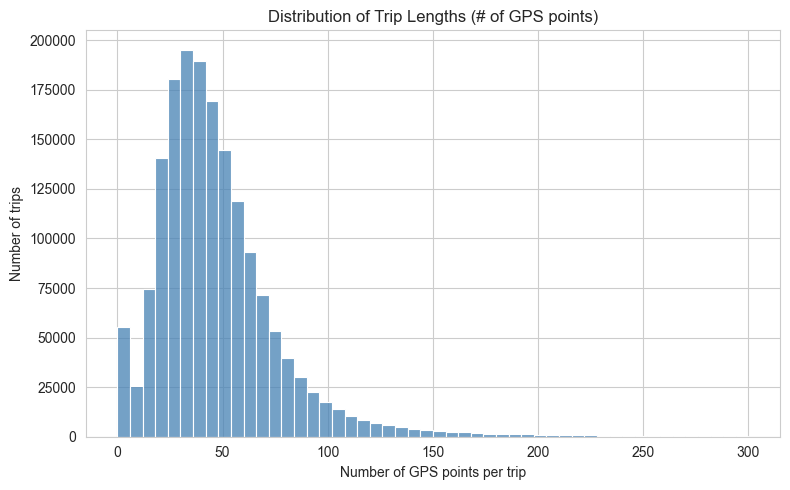

In [87]:
plt.figure(figsize=(8,5))
sns.histplot(
    df.loc[(df["MISSING_DATA"]==False) & (df["NUM_POINTS"].between(0,300)), "NUM_POINTS"],
    bins=50,
    color="steelblue"
)
plt.title("Distribution of Trip Lengths (# of GPS points)")
plt.xlabel("Number of GPS points per trip")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()


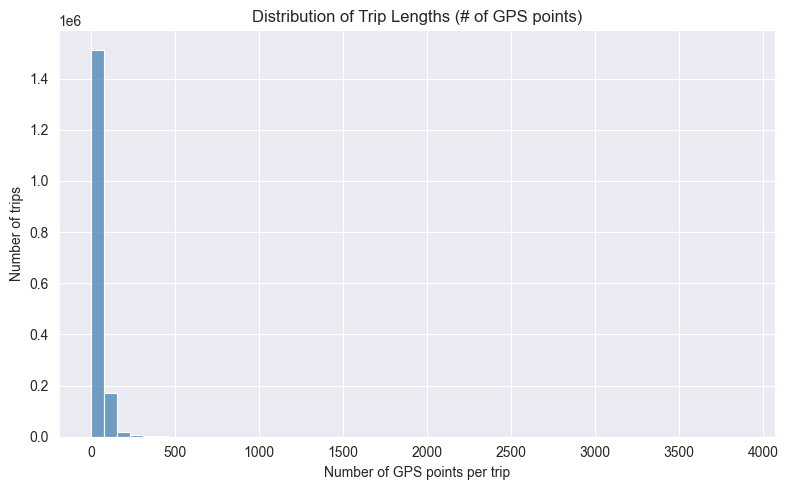

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["NUM_POINTS"].where(df["MISSING_DATA"]==False), bins=50, color="steelblue")
plt.title("Distribution of Trip Lengths (# of GPS points)")
plt.xlabel("Number of GPS points per trip")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()

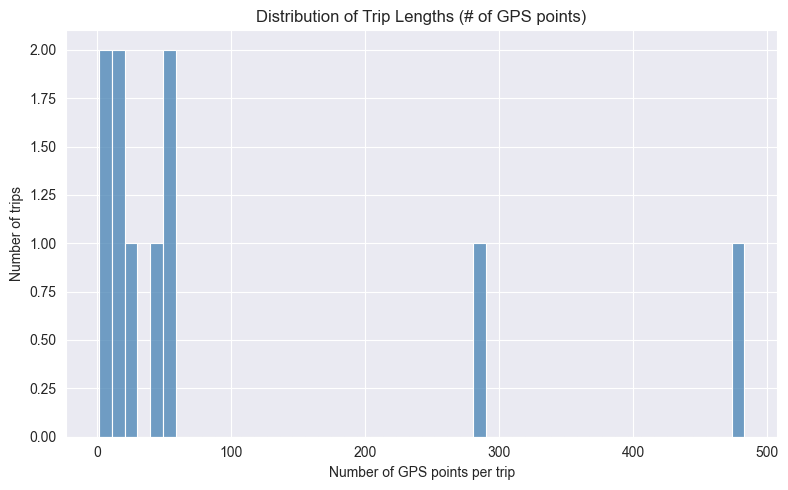

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df["NUM_POINTS"].where(df["MISSING_DATA"]==True), bins=50, color="steelblue")
plt.title("Distribution of Trip Lengths (# of GPS points)")
plt.xlabel("Number of GPS points per trip")
plt.ylabel("Number of trips")
plt.tight_layout()
plt.show()

In [91]:
df_filtered = df[df["MISSING_DATA"] == True]
df_filtered[['TRIP_ID', 'NUM_POINTS']]

,TRIP_ID,NUM_POINTS
105621,1374554455620000625,43
171397,1375863510620000454,1
299137,1378544246620000057,11
457486,1381233613620000387,483
738466,1386346894620000904,285
782321,1387137779620000640,51
848552,1388351478620000678,27
932391,1390005983620000640,14
1275934,1396631707620000163,1
1432196,1399405185620000508,53


In [92]:
df_filtered

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,timestamp2,year,month,day,hour,weekday,NUM_POINTS
105621,1374554455620000625,B,NaN,23.0,20000625,1374554455,A,True,"[[-8.612559, 41.145975], [-8.612577, 41.145975...",2013-07-23 04:40:55,2013,7,23,4,Tuesday,43
171397,1375863510620000454,B,NaN,62.0,20000454,1375863510,A,True,"[[-0.205893, 41.010282]]",2013-08-07 08:18:30,2013,8,7,8,Wednesday,1
299137,1378544246620000057,B,NaN,55.0,20000057,1378544246,A,True,"[[-8.569719, 41.166135], [-8.567928, 41.166477...",2013-09-07 08:57:26,2013,9,7,8,Saturday,11
457486,1381233613620000387,C,NaN,NaN,20000387,1381233613,A,True,"[[-8.626347, 41.153436], [-8.626275, 41.152905...",2013-10-08 12:00:13,2013,10,8,12,Tuesday,483
738466,1386346894620000904,C,NaN,NaN,20000904,1386346894,A,True,"[[-8.652816, 40.636575], [-8.652807, 40.636566...",2013-12-06 16:21:34,2013,12,6,16,Friday,285
782321,1387137779620000640,C,NaN,NaN,20000640,1387137779,A,True,"[[-8.604558, 41.161941], [-8.604477, 41.162013...",2013-12-15 20:02:59,2013,12,15,20,Sunday,51
848552,1388351478620000678,A,9738.0,NaN,20000678,1388351478,A,True,"[[-8.609697, 41.160276], [-8.609571, 41.16033]...",2013-12-29 21:11:18,2013,12,29,21,Sunday,27
932391,1390005983620000640,C,NaN,NaN,20000640,1390005983,A,True,"[[-8.604792, 41.16123], [-8.604801, 41.161167]...",2014-01-18 00:46:23,2014,1,18,0,Saturday,14
1275934,1396631707620000163,C,NaN,NaN,20000163,1396631707,A,True,"[[-10.634022, 43.834248]]",2014-04-04 17:15:07,2014,4,4,17,Friday,1
1432196,1399405185620000508,C,NaN,NaN,20000508,1399405185,A,True,"[[-8.620011, 41.14683], [-8.619957, 41.146659]...",2014-05-06 19:39:45,2014,5,6,19,Tuesday,53


In [29]:
import pandas as pd
import os

# Create an output folder for the CSVs
output_dir = "gpsviz_files"
os.makedirs(output_dir, exist_ok=True)

# Filter only rows with missing data
missing_rows = df[df["MISSING_DATA"] == True]

for idx, row in missing_rows.iterrows():
    coords = row["POLYLINE"]   # already parsed list of [lon, lat]

    # Convert into DataFrame with correct columns
    coords_df = pd.DataFrame(coords, columns=["longitude", "latitude"])

    trip_name = f"trip_{idx}"

    # Save to CSV
    file_path = os.path.join(output_dir, f"{trip_name}.csv")
    coords_df.to_csv(file_path, index=False)

    print(f"Saved {file_path}")

Saved gpsviz_files\trip_105621.csv
Saved gpsviz_files\trip_171397.csv
Saved gpsviz_files\trip_299137.csv
Saved gpsviz_files\trip_457486.csv
Saved gpsviz_files\trip_738466.csv
Saved gpsviz_files\trip_782321.csv
Saved gpsviz_files\trip_848552.csv
Saved gpsviz_files\trip_932391.csv
Saved gpsviz_files\trip_1275934.csv
Saved gpsviz_files\trip_1432196.csv


In [28]:
import pandas as pd
import os

# Create an output folder for the CSVs
output_dir = "gpsviz_files"
os.makedirs(output_dir, exist_ok=True)

# Filter only rows with missing data
missing_rows = df[df["MISSING_DATA"] == True]

for idx, row in missing_rows.iterrows():
    coords = row["POLYLINE"]   # already parsed list of [lon, lat]

    if not coords:
        continue

    # Convert coords to DataFrame (lon, lat -> then reorder)
    coords_df = pd.DataFrame(coords, columns=["longitude", "latitude"])

    # Add name and desc
    coords_df.insert(0, "name", "")
    coords_df.insert(1, "desc", "")

    # Mark start and end
    coords_df.loc[coords_df.index[0], "name"] = "start"
    coords_df.loc[coords_df.index[-1], "name"] = "end"

    # Reorder columns to name, desc, latitude, longitude
    coords_df = coords_df[["name", "desc", "latitude", "longitude"]]

    # Trip name
    trip_name = f"trip_{idx}"

    # Save to CSV
    file_path = os.path.join(output_dir, f"{trip_name}.csv")
    coords_df.to_csv(file_path, index=False)

    print(f"Saved {file_path}")


Saved gpsviz_files\trip_105621.csv
Saved gpsviz_files\trip_171397.csv
Saved gpsviz_files\trip_299137.csv
Saved gpsviz_files\trip_457486.csv
Saved gpsviz_files\trip_738466.csv
Saved gpsviz_files\trip_782321.csv
Saved gpsviz_files\trip_848552.csv
Saved gpsviz_files\trip_932391.csv
Saved gpsviz_files\trip_1275934.csv
Saved gpsviz_files\trip_1432196.csv
